$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{September 19, 2025}\\\\\
\text{ Prepared by: Vivek Kumar Agarwal}\\\\
\textbf{Recitation 3: Statistics vsProbability}
\end{array}
$$

# Statistics vsProbability - (Based on Lec 5 \& 6)

![Causal Inference](../figures/CI_lab3_image1.jpg)

---

## Today's Recitation 

- HW 1 Discussion
- Revisit - Conditional Variance and Independence
- Revisit - All Causes Model 
- Statistics vs Probability
- What is Statistics?
- Lets Code!!


---

## HW 1 - Questions and Discussion 

---

## Conditional Variance and Independence

#### Conditional Variance

\begin{align}
 \text{Var}(Y|X) &= E[(Y - E[Y|X])^2 | X] \\
 &= E[Y^2|X] - (E[Y|X])^2
\end{align}



#### Independence
$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B)
$$

Also,

$$
P(Y|X) = P(Y) \ \ \text{and} \ \ P(X|Y) = P(X)
$$

If two variables are independent, then knowing the value of one variable does not provide additional information about the other.

It is also the case that independent variables have a covariance of 0 and are, therefore, uncorrelated.
- Proof in lecture slides by showing

$$\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$$

+ Let us revisit the notebook from Lab 2.

---

## All Causes Model 

### Definition

All causes model:

$$Y(S, U)$$

where $Y$ is the outcome, $S$ is the state of the world, and $U$ is other factors we observe that influence $Y$.

Also, for simplicity, consider $S$ as a binary treatment variable (0 or 1).

Causal quantities of interest:


\begin{align}
\text{ATE} &= E[Y(S=1, U) - Y(S=0, U)]\\
\text{ATT} &= E[Y(S=1, U) - Y(S=0, U)|S=1]\\
\text{ATU} &= E[Y(S=1, U) - Y(S=0, U)|S=0]
\end{align}

+ Lets us revisit the notebook from Lab 1. 

---

## Probability vs Statistics

+ Probability  → Deductive reasoning {From general principles to specific predictions}

+ Statistics  → Inductive reasoning {From specific observations to general principles}

The Fundamental Relationship

You can think of probability and statistics as inverse problems:

+ Probability: Model → Predictions about data

+ Statistics: Data → Inferences about the model

An Example - Imagine a jar of colored marbles:

+ Probability approach: "This jar has 60% red marbles and 40% blue marbles. If I draw 10 marbles randomly, what's the chance I get exactly 6 red ones?"

+ Statistics approach: "I drew 10 marbles and got 6 red and 4 blue. What can I conclude about the composition of marbles in the jar?"

To Conclude: 

+ Probability provides the mathematical foundation and tools for modeling uncertainty

+ Statistics provides methods for learning from data and testing our probabilistic models


### To State Mathematically!!!

Suppose that $X_1, ..., X_n$ are independent random variables with some cdf $F$.

**Probability**: $F$ is known and we can (in theory) calculate probabilities involving the random variables $X_1, ..., X_n$, e.g., $P(a \leq \bar{X} \leq b)$.
- Knowledge of the population (i.e. F) gives us information about the nature of the samples from that population.

**Statistics**: $F$ is unknown and we observe outcomes of the random variables $x_1, ..., x_n$.
- We use the information in the data to estimate or infer properties of the unknown distribution $F$.

---

### What is the meaning of unbiased estimator?

Let us consider a Gaussian Distribution:

$$
\begin{align}
    f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} \\
    &= \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} \quad \text{for } \mu = 0, \sigma = 1
\end{align}
$$  

Given i.i.d samples $x_1, ..., x_n$ from a Gaussian distribution, we would like to estimate the mean of the distribution.

A good estimator $\hat{\mu}_n$ for the mean of Gaussian is the sample mean $
\hat{\mu}_n = \frac{1}{n} \sum_{i=1}^{n} x_i
$.

This is intuitive, and you can show this via maximum likelihood estimation.

In [1]:
## Let us import the libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats

from IPython.display import display, Math


In [2]:
# Step 1: Generate a sample of n data points from a Gaussian distribution
np.random.seed(42)
n = 1000
true_mu = 5  # True population mean
true_sigma = 2  # True population standard deviation
data = np.random.normal(loc=true_mu, scale=true_sigma, size=n)

# Step 2: Calculate the sample mean
sample_mean = np.mean(data)
print(f"Sample Mean: {sample_mean}")

# Step 3: Simulate multiple samples to show unbiasedness
num_simulations = 1000
sample_means = [np.mean(np.random.normal(true_mu, true_sigma, n)) for _ in range(num_simulations)]
print(f"Average of Sample Means (across simulations): {np.mean(sample_means)}")

Sample Mean: 5.0386641116446516
Average of Sample Means (across simulations): 4.996833232634605


This is an unbiased estimator for $\mu$, i.e., the expected value of the sample mean equals the true mean.

$$
\text{Bias}(\hat{\mu}_n) = E[\hat{\mu}_n] - \mu = 0
$$

Also, the variance of the sample mean is simply the variance of the Gaussian divide by the sample size (the sample mean gets close to the true mean as we increase sample size).

$$
\text{Var}(\hat{\mu}_n) = \frac{\sigma^2}{n}
$$



In [3]:
# Step 4: Calculate the bias of the sample mean
bias = np.mean(sample_means) - true_mu
print(f"Bias of the Sample Mean: {bias}")

# Step 5: Calculate the variance of the sample mean
variance = np.var(sample_means)
print(f"Variance of the Sample Mean: {variance}")

# Theoretical variance of the sample mean for Gaussian distribution
theoretical_variance = (true_sigma ** 2) / n
print(f"Theoretical Variance: {theoretical_variance}")

Bias of the Sample Mean: -0.0031667673653945627
Variance of the Sample Mean: 0.004145252787930502
Theoretical Variance: 0.004


This estimator is also consistent based on the Weak Law of Large Number (WLLN).

$$
\lim_{n \to \infty} P\left( |\overline{X}_n - \mu| > \epsilon \right) = 0
$$

Sample Means for different sizes: [4.710905546907496, 5.414024467021665, 4.782722755544523, 4.567195741630208, 5.000857451210413, 5.077863617662095, 5.019700795749149, 5.026006940904063, 5.002327783361207, 4.997753484426097]


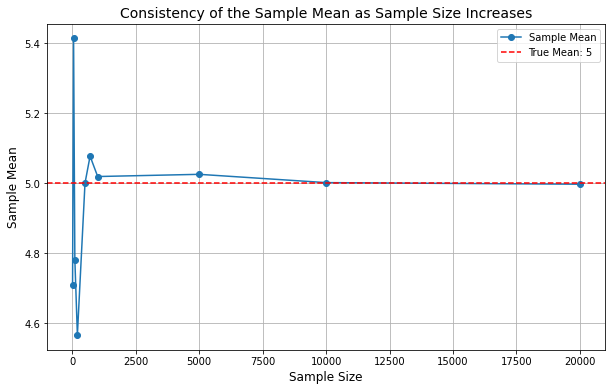

In [4]:
# Simulate increasing sample sizes and calculate the sample mean for each size
np.random.seed(201)
sample_sizes = [10, 50, 100, 200, 500, 700, 1000, 5000, 10000, 20000]
means = []

for size in sample_sizes:
    sample = np.random.normal(loc=true_mu, scale=true_sigma, size=size)
    means.append(np.mean(sample))

print(f"Sample Means for different sizes: {means}")

plt.figure(figsize=(10, 6))

# Plot the sample means for each sample size
plt.plot(sample_sizes, means, marker='o', linestyle='-', label='Sample Mean')

# Add horizontal line for the true mean
plt.axhline(y=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')

# Add labels and title
plt.title('Consistency of the Sample Mean as Sample Size Increases', fontsize=14)
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Sample Mean', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()



### Central Limit Theorem (CLT) 

It states that for large $n$:

$$
\hat{\mu}_n \sim N\left(\mu, \frac{\sigma^2}{n}\right)
$$

In this case, we don't actually need CLT to know that the sampling distribution approximates Gaussian. We know the samples are Gaussian, and the sample mean is just a linear combination of these Gaussians. It follows exactly a Gaussian distribution.

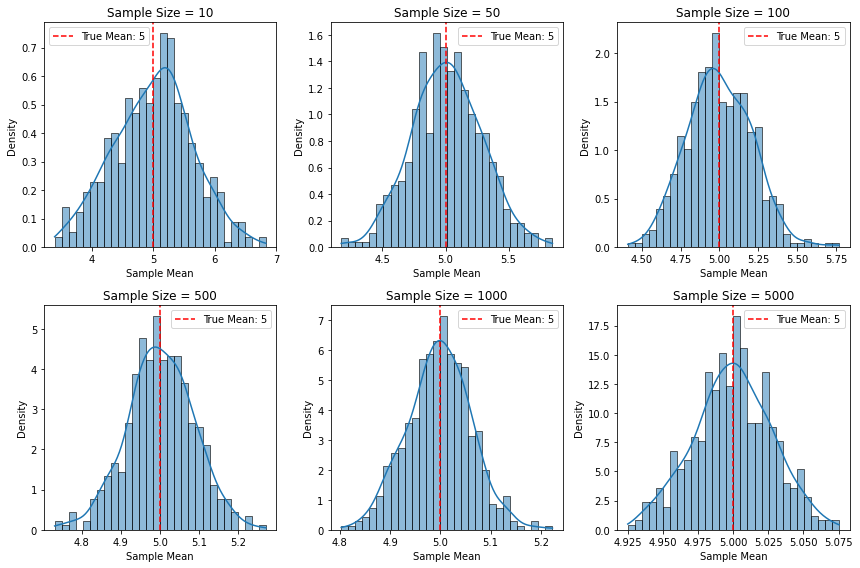

In [5]:
n_trials = [10, 50, 100, 500, 1000, 5000]  # Sample sizes
num_simulations = 500  # Number of simulations to estimate the distribution of the sample mean

# Generate sample means for different sample sizes
sample_means_dict = {}

for n in n_trials:
    sample_means = [np.mean(np.random.normal(true_mu, true_sigma, n)) for _ in range(num_simulations)]
    sample_means_dict[n] = sample_means

# Plot histograms of the sample means for different sample sizes
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_trials, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sample_means_dict[n], bins=30, kde=True, stat="density")
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.axvline(x=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')
    plt.legend()

plt.tight_layout()
plt.show()

The real power of CLT comes from the fact that the original samples can come from a potentially unknown and very complex data distribution.

Central Limit Theorem with non-Gaussian Data

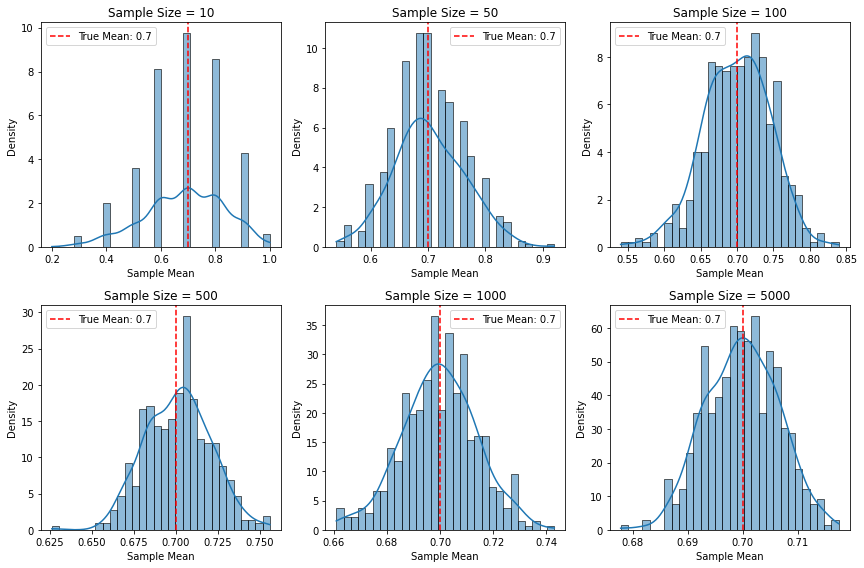

In [6]:
# Set Bernoulli distribution parameter
p = 0.7  # Probability of success
true_mu = p  # The true mean of the Bernoulli distribution
n_trials = [10, 50, 100, 500, 1000, 5000]  # Sample sizes
num_simulations = 500  # Number of simulations to estimate the distribution of the sample mean

# Step 1: Generate sample means for different sample sizes
sample_means_dict = {}

for n in n_trials:
    sample_means = [np.mean(np.random.binomial(1, p, n)) for _ in range(num_simulations)]
    sample_means_dict[n] = sample_means

# Step 2: Plot histograms of the sample means for different sample sizes
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_trials, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sample_means_dict[n], bins=30, kde=True, stat="density")
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.axvline(x=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')
    plt.legend()

plt.tight_layout()
plt.show()

## Hypothesis Testing


A key goal in causal inference is to make informed decisions based on sample data. Hypothesis testing helps us decide whether to **accept** or **reject** a claim about a population parameter based on evidence from our data.

### Key Concepts

1. **Null Hypothesis ($H_0$)**:  
   Represents the default assumption we aim to **disprove**. For example, in a medical trial, it might state that a new treatment has no effect.

2. **Alternative Hypothesis ($H_1$)**:  
   What we want to **prove** through analysis, proposing an outcome different from $H_0$. For instance, it may claim that the new treatment **does** have an effect.

3. **Test Statistic ($T_n$)**:  
   A measure of how far our sample data deviates from expectations under $H_0$, quantifying the strength of evidence against it.

4. **Critical Value ($c$)**:  
   A threshold defining what is “significant” evidence. If our test statistic exceeds this value, we reject $H_0$.

5. **Decision Rule**:  
   If the test statistic is greater than the $c$, we reject $H_0$ in favor of $H_1$. If it's less than or equal to the critical value, we **fail to reject** $H_0$. Note that failing to reject $H_0$ does not prove it true; it just indicates insufficient evidence against it.

> **Significance** ($\alpha$) and **P-Value**: A result is considered **significant** if the evidence against $H_0$ is strong. The **p-value** measures this evidence. It indicates the probability of observing data as extreme as ours if $H_0$ were true. A low p-value (typically < 0.05) suggests strong evidence against $H_0$.


Now, let's apply our hypothesis testing framework by simulating a dataset and examining the results.

#### a) Simulate a Dataset

We'll start by generating a dataset from a normal distribution, specifically $X \sim N(5, 1.5)$.

In [7]:
np.random.seed(42)
mu, sigma= 5.0, 1.5
sample = np.random.normal(loc=mu, scale=sigma, size=1000)


n = len(sample)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

#### Define our hypothesis

Our null hypothesis ($H_0$) states that the population mean is equal to 8. The alternative hypothesis ($H_1$) suggests that the mean is different from this value.




$$H_0: \mathbb{E}[X] =8, \quad H_1: \mathbb{E}[X] \neq 8.$$


In [8]:
mu_0=8

####  Set a significance level $\alpha$


The significance level $\alpha$ is the threshold we set for deciding how much evidence we need to reject $H_0$. It represents the risk we are willing to accept for falsely rejecting the $H_0$ (Type I error). Common choices for 𝛼 are
0.05 or
0.01. This means we are willing to accept a 5% or 1% chance of making an error.

In [9]:
# Significance level
alpha=0.05

#### d) Compute $T_n$

To quantitatively assess whether our sample provides enough evidence to reject $H_0$, we use the t-test statistic:

$$T_n = \frac{\sqrt{n}}{\hat{\sigma}_n} \left( |\overline{X_n} - \mu_0| \right).$$

$T_n$ measures how far our sample mean ($\overline{X_n}$) is from the hypothesized mean ($\mu_0$). The larger the value of $T_n$, the more evidence we have against the null hypothesis ($H_0$).

> Recall that, as the sample size  $n$ increases, the distribution of the sample mean $\bar{X_n}$ approaches normality due to the Central Limit Theorem (CLT):

$$
\bar{X_n} \sim N(\mu, \frac{\sigma}{\sqrt{n}})
$$

This implies,

$$
T_n \sim N(0, 1).
$$

This property enables the use of normal distribution properties to derive critical values, calculate p-values, and make informed decisions based on statistical evidence.


In [10]:
def compute_test_statistic(sample_mean, sample_std, mu_0):
    T_n = np.sqrt(n) * abs(sample_mean - mu_0) / sample_std
    return T_n

T_n = compute_test_statistic(sample_mean, sample_std, mu_0)
display(Math(f"T_n: {T_n}"))

<IPython.core.display.Math object>

#### Define the critical value $c$

To determine the critical value $c$, we want to find the value such that:

$$
2\big(1 - \Phi(c)\big) = \alpha,
$$

where $\Phi$ is the CDF of the standard normal distribution. The factor of 2 accounts for the two-sided nature of our test.


- Rearranging this equation helps us find $\Phi(c) $:

   $$
   \Phi(c) = 1 - \frac{\alpha}{2}
   $$

This gives us the critical value that corresponds to our chosen $\alpha$.

In [11]:
critical_value = stats.norm.ppf(1 - alpha / 2)
display(Math(f"\\text{{For }} \\alpha = {alpha}, \\text{{the critical value}} \, c \,\\text{{is}} \, {round(critical_value, 2)}"))

<IPython.core.display.Math object>

What is Type I error rate?

Type I error rate is the probability of rejecting the null hypothesis when it is actually true. It is also known as the significance level or alpha level. The most common value for the Type I error rate is 0.05, which means that there is a 5% chance of rejecting the null hypothesis when it is true.

+ By setting a critical value $c$, we control the Type I error rate. i.e., if $H_0$ is true, the probability that our test statistic falls beyond $c$ (rejection region) is equal to $\alpha$:

$$
P(T_n > c) = \alpha.
$$




#### $p_n$



To measure the strength of evidence against the null hypothesis ($H_0$), we estimate the p-value $\hat{p_n}$:

$$
\hat{p_n} = 2(1 - \Phi(T_n)).
$$

This p-value tells us the smallest significance level $\alpha$ at which we would reject $H_0$. If $T_n$ is large, $\hat{p_n}$ will be small, indicating strong evidence against $H_0$. A smaller p-value means the observed data is very unlikely under the null hypothesis.

In [12]:
def compute_p_value(T_n):
    p_value = 2 * (1 - stats.norm.cdf(T_n))
    return p_value

p_value = compute_p_value(T_n)
display(Math(f"\\hat p_n = {round(p_value, 10)}"))

<IPython.core.display.Math object>

A **p-value of 0.0** (or very close to 0) suggests **strong evidence against the null hypothesis**. In other words, the difference between the sample mean and the population mean is statistically significant.

* Typically, if the p-value is below a chosen significance level (e.g., 0.05), we reject the null hypothesis.


+ Alternatively, we could use a predefined function within the SciPy library to perform a one-sample t-test.

In [13]:
stats.ttest_1samp(sample, mu_0)

Ttest_1sampResult(statistic=-63.9636442573448, pvalue=0.0)

In [14]:
stats.t.ppf(q=0.025, df=n-1), stats.t.ppf(q=0.975, df=n-1)

(-1.962341461133449, 1.9623414611334487)

#### Confidence Sets

For a two-sided test, the confidence interval is given by:
$$
C_n = \left[\overline{X_n} \pm \frac{\hat{\sigma}_n}{\sqrt{n}} \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)\right]
$$

where $\frac{\hat{\sigma}_n}{\sqrt{n}} \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)$ represents the margin of error around the sample mean.

This interval will give us a range of values that, with a certain level of confidence (typically 95%), is likely to contain the true population mean.

In [15]:
def compute_confidence_interval(sample_mean, sample_std, n, alpha):
    z_critical = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z_critical * (sample_std / np.sqrt(n))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return confidence_interval

confidence_interval = compute_confidence_interval(sample_mean, sample_std, n, alpha)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (4.9380066375012746, 5.119989529965702)


+ we can visualize the results using a plot that includes the simulated sample, the sample mean, the hypothesized mean, and the confidence interval.

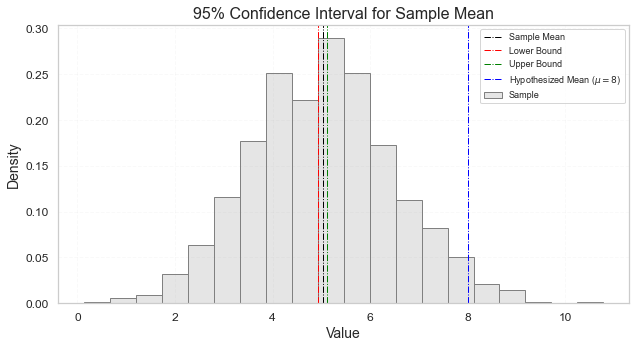

In [16]:
sns.set(style='whitegrid', palette='deep')
plt.figure(figsize=(9, 5))
sns.histplot(sample, bins=20, stat="density", color='grey', edgecolor='grey', alpha=0.2, label='Sample')
plt.axvline(np.mean(sample), color='black', linestyle='-.', linewidth=1, label="Sample Mean")
plt.axvline(confidence_interval[0], color='red', linestyle='-.', linewidth=1, label="Lower Bound")
plt.axvline(confidence_interval[1], color='green', linestyle='-.', linewidth=1, label="Upper Bound")
plt.axvline(mu_0, color='blue', linestyle='-.', linewidth=1, label="Hypothesized Mean ($\mu = 8$)")
plt.title("95% Confidence Interval for Sample Mean", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.1)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

## Key Takeaway from the plot above 

+ The 95% confidence interval tells us: "Based on our sample data, we're 95% confident that the true population mean lies between the red andgreen lines.

+ The hypothesized mean (μ = 8, blue line) falls outside the confidence interval. This suggests that our sample provides strong evidence that the true population mean is not 8 - it's likely closer to 5.

---


### Office Hours Monday 3PM - 4PM  Room No - 244
or drop in your questions at vka244@nyu.edu

---